In [1]:
%pylab inline
from glob import glob
import os
import pandas
import json_object as jso
import pickle
import re
import scipy.signal as sig
import pandas as pd
import seaborn as sns

from pypevoc.Heterodyne import HeterodyneHarmonic
from pypevoc.PVAnalysis import PV


Populating the interactive namespace from numpy and matplotlib


In [3]:
#resdf = pd.read_csv('simulation_analysis_20200505-clarino.csv')
resdf = pd.read_csv('/Users/goios/Data/clarinet_simulations/20200506-hiqhQreed_vtlosses/simulation_analysis_20200506-hiqhQreed_vtlosses.csv')

(250, 1500)

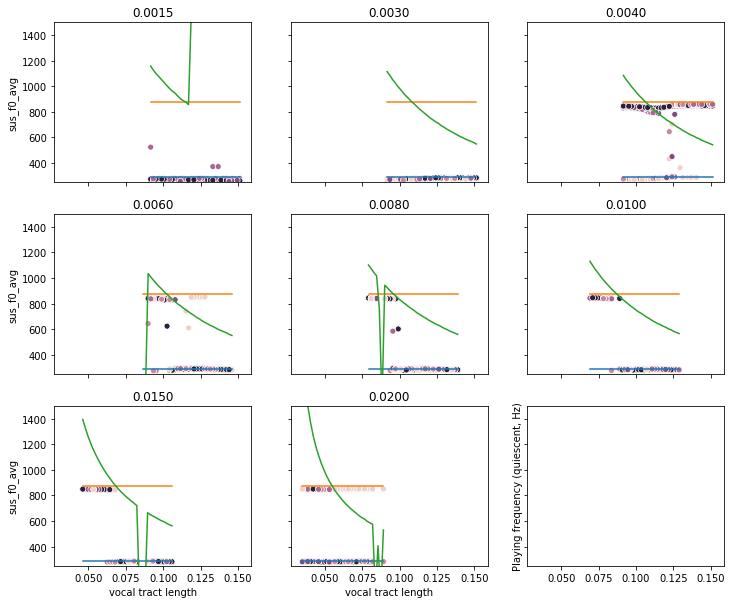

In [4]:
nplots = len(resdf['tongue radius'].unique())
nrows=3
ncols = int(np.ceil(nplots/nrows))

fig,ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(12,10))
axf = ax.flatten()

trad = sorted(resdf['tongue radius'].unique())

for ii,rad in enumerate(trad):
    partdf = resdf[resdf['tongue radius']==rad]
    sns.scatterplot(data=partdf,x='vocal tract length',y='sus_f0_avg',hue='blowing pressure',ax=axf[ii],legend=False)
    axf[ii].set_title('{:.4f}'.format(rad))
    bp = partdf['blowing pressure'].unique()[0]
    zdf = partdf[partdf['blowing pressure']==bp].sort_values('vocal tract length')
    axf[ii].plot(zdf['vocal tract length'],zdf['z_bore_pk_f_0'],label='bore peak 1')
    axf[ii].plot(zdf['vocal tract length'],zdf['z_bore_pk_f_1'],label='bore peak 2')
    axf[ii].plot(zdf['vocal tract length'],zdf['z_vocal_pk_f_0'], label='vt peak')
    #legend(loc='upper left',bbox_to_anchor=(1,1))
    #axf[ii].legend(None)
    ylabel('Playing frequency (quiescent, Hz)')
#ylim(300,440)
ylim(250,1500)

No handles with labels found to put in legend.


(0, 10)

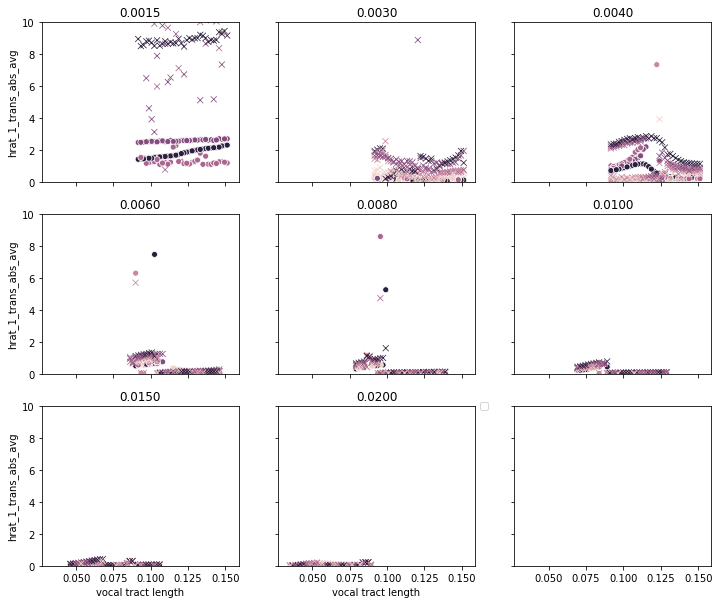

In [5]:
fig,ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(12,10))
axf = ax.flatten()

for ii,rad in enumerate(trad):
    partdf = resdf[resdf['tongue radius']==rad]
    axf[ii].set_title('{:.4f}'.format(rad))
    sns.scatterplot(data=partdf,x='vocal tract length',y='hrat_1_sus_abs_avg',hue='blowing pressure',ax=axf[ii],legend=False)
    #axf[ii].set_ylabel('quiesent pvt/pb (H1)')
    sns.scatterplot(data=partdf,x='vocal tract length',y='hrat_1_trans_abs_avg',hue='blowing pressure',ax=axf[ii],marker='x',legend=False)
    #axf[ii].set_ylabel('tranient pvt/pb (H1)')
    #ax[0].set_ylim(0,2)
axf[ii].legend(loc='center left',bbox_to_anchor=(1,1))
ylim(0,10)

In [6]:
tr=sorted(resdf['tongue radius'].unique())
tr

[0.0015, 0.003, 0.004, 0.006, 0.008, 0.01, 0.015, 0.02]

In [7]:
partdf = resdf[resdf['tongue radius']==tr[2]]

(800, 900)

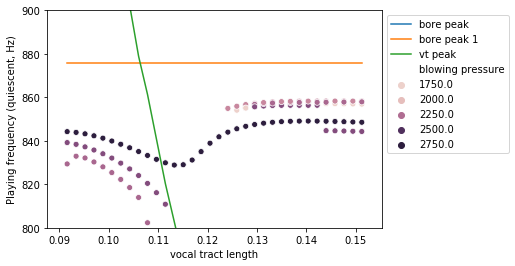

In [8]:
sns.scatterplot(data=partdf,x='vocal tract length',y='sus_f0_avg',hue='blowing pressure')
bp = partdf['blowing pressure'].unique()[0]
zdf = partdf[partdf['blowing pressure']==bp].sort_values('vocal tract length')
plot(zdf['vocal tract length'],zdf['z_bore_pk_f_0'],label='bore peak')
plot(zdf['vocal tract length'],zdf['z_bore_pk_f_1'],label='bore peak 1')
plot(zdf['vocal tract length'],zdf['z_vocal_pk_f_0'], label='vt peak')
legend(loc='upper left',bbox_to_anchor=(1,1))
ylabel('Playing frequency (quiescent, Hz)')
#ylim(240,440)
ylim(800,900)

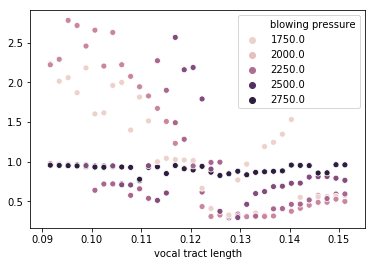

In [9]:
sns.scatterplot(data=partdf,x='vocal tract length',y=partdf['trans_f0_avg']/partdf['sus_f0_avg'],hue='blowing pressure')
#ylim(.8,1.2)

In [10]:
partdf.columns.tolist()

['Unnamed: 0',
 'filename',
 'tongue radius',
 'vocal tract length',
 'blowing pressure',
 'z_bore_pk_f_0',
 'z_bore_pk_z_0',
 'z_bore_pk_f_1',
 'z_bore_pk_z_1',
 'z_bore_pk_f_2',
 'z_bore_pk_z_2',
 'z_vocal_pk_f_0',
 'z_vocal_pk_z_0',
 'z_vocal_pk_f_1',
 'z_vocal_pk_z_1',
 'z_vocal_pk_f_2',
 'z_vocal_pk_z_2',
 'lf0',
 'bore length',
 'sus_f0_avg',
 'sus_f0_std',
 'trans_f0_avg',
 'trans_f0_std',
 'bore_0_trans_start',
 'bore_0_trans_end',
 'bore_1_sus_abs_avg',
 'bore_1_sus_abs_std',
 'bore_1_sus_arg_avg',
 'bore_1_sus_arg_std',
 'hrat_1_sus_arg_avg',
 'hrat_1_sus_arg_std',
 'hrat_1_sus_abs_avg',
 'hrat_1_sus_abs_std',
 'bore_1_trans_abs_avg',
 'bore_1_trans_abs_std',
 'bore_1_trans_arg_avg',
 'bore_1_trans_arg_std',
 'hrat_1_trans_arg_avg',
 'hrat_1_trans_arg_std',
 'hrat_1_trans_abs_avg',
 'hrat_1_trans_abs_std',
 'rate_1_trans',
 'rate_1_trans_resid',
 'vt_0_trans_start',
 'vt_0_trans_end',
 'vt_1_sus_abs_avg',
 'vt_1_sus_abs_std',
 'vt_1_sus_arg_avg',
 'vt_1_sus_arg_std',
 'vt_1_t

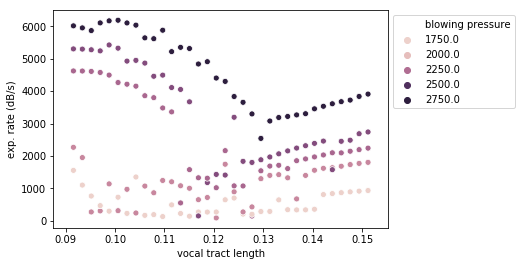

In [11]:
sns.scatterplot(data=partdf,x='vocal tract length',y='rate_1_trans',hue='blowing pressure')
#ylim(320,400)
ylabel('exp. rate (dB/s)')
legend(loc='upper left',bbox_to_anchor=(1,1))

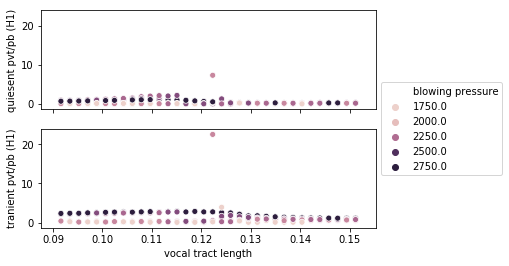

In [12]:
fig,ax = subplots(2, sharex=True, sharey=True)
sns.scatterplot(data=partdf,x='vocal tract length',y='hrat_1_sus_abs_avg',hue='blowing pressure',ax=ax[0],legend=False)
ax[0].set_ylabel('quiesent pvt/pb (H1)')
sns.scatterplot(data=partdf,x='vocal tract length',y='hrat_1_trans_abs_avg',hue='blowing pressure',ax=ax[1])
ax[1].set_ylabel('tranient pvt/pb (H1)')
#ax[0].set_ylim(0,2)
ax[1].legend(loc='center left',bbox_to_anchor=(1,1))

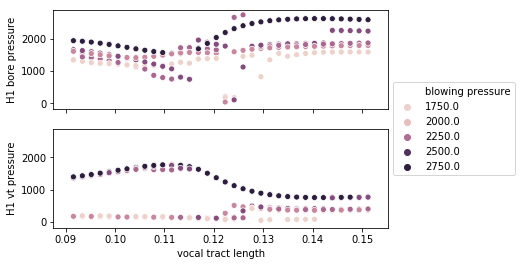

In [13]:
fig,ax = subplots(2, sharex=True, sharey=True)
sns.scatterplot(data=partdf,x='vocal tract length',y='bore_1_sus_abs_avg',hue='blowing pressure',legend=False,ax=ax[0])
ax[0].set_ylabel('H1 bore pressure')
sns.scatterplot(data=partdf,x='vocal tract length',y='vt_1_sus_abs_avg',hue='blowing pressure',ax=ax[1])
ax[1].set_ylabel('H1 vt pressure')
ax[1].legend(loc='center left',bbox_to_anchor=(1,1))

In [ ]:
isus = pvoc.t>(pvoc.t[-1]-tsust)
fsus = pvoc.fundamental_frequency[isus]
print(np.mean(fsus),np.std(fsus))
asus = pvoc.fundamental_magnitude[isus]
print(np.mean(asus),np.std(asus),np.polyfit(pvoc.t[isus],asus,1))

In [ ]:
results={}

amax = max(pvoc.fundamental_magnitude)

a_trans_end = amax*.9
a_trans_start = amax*.01
i_trans_end = np.flatnonzero(pvoc.fundamental_magnitude>a_trans_end)[0]-1
i_trans_start = np.flatnonzero(pvoc.fundamental_magnitude[:i_trans_end]<a_trans_start)[-1]
i_trans = slice(i_trans_start,i_trans_end)
atrans = 20*np.log10(pvoc.fundamental_magnitude[i_trans])
ttrans = pvoc.t[i_trans]
polytrans = np.polyfit(ttrans,atrans,1) 
print(polytrans)
fig,ax = subplots(1)
ax.plot(pvoc.t,20*np.log10(pvoc.fundamental_magnitude))
ax.plot(pvoc.t[i_trans],np.polyval(polytrans,pvoc.t[i_trans]))
ax.axvspan(pvoc.t[i_trans_start],pvoc.t[i_trans_end],color='red',alpha=.2)

fsusav = np.mean(fsus)
print('sust','f0',fsusav,np.std(fsus))
print('trns','f0',np.mean(pvoc.fundamental_frequency[i_trans]),np.std(pvoc.fundamental_frequency[i_trans]))
results['sus_f0_avg']=fsusav
results['sus_f0_std']=np.std(fsus)
results['trans_f0_avg']=np.mean(pvoc.fundamental_frequency[i_trans])
results['trans_f0_std']=np.std(pvoc.fundamental_frequency[i_trans])


hhb = HeterodyneHarmonic(pb,sr=sr,nwind=1024*2,nhop=256*2,f=fsusav)
hhv = HeterodyneHarmonic(pv,sr=sr,nwind=1024*2,nhop=256*2,f=fsusav)

for ii in range(3):
    ax.plot(hhb.t,20*np.log10(np.abs(hhb.camp[:,ii])))
for ii in range(3):
    ax.plot(hhv.t,20*np.log10(np.abs(hhv.camp[:,ii])),ls='--')

t_trans_start = pvoc.t[i_trans_start]
t_trans_end = pvoc.t[i_trans_end]


hidxsus = hhb.t>(hhb.t[-1]-tsust)
hidxtrans = (hhb.t>=t_trans_start) & (hhb.t<=t_trans_end)

for ii in range(3):
    print('harm ',ii+1)
    for hlab,hh in [('bore',hhb),('vt',hhv)]:
        print(' '*2,hlab)
        v = np.abs(hh.camp[:,ii])
        amax = max(v)
        a_trans_end = amax*.9
        a_trans_start = amax*.01
        i_trans_end = np.flatnonzero(v>a_trans_end)[0]-1
        i_trans_start = np.flatnonzero(v[:i_trans_end]<a_trans_start)[-1]
        print(' '*4,'trans times',hh.t[i_trans_start],hh.t[i_trans_end])
        results['{}_{}_trans_start'.format(hlab,ii)]=hh.t[i_trans_start]
        results['{}_{}_trans_end'.format(hlab,ii)]=hh.t[i_trans_end]

        hidxtrans = slice(i_trans_start,i_trans_end)

        for rlab, reg in [('sus',hidxsus),('trans',hidxtrans)]:
            
            v = hh.camp[reg,ii]
            print(' '*4,rlab,'abs',np.mean(np.abs(v)),np.std(np.abs(v)))
            print(' '*4,rlab,'arg',np.mean(np.unwrap(np.angle(v))),np.std(np.unwrap(np.angle(v))))
            results['{}_{}_{}_abs_avg'.format(hlab,ii+1,rlab)] = np.mean(np.abs(v))
            results['{}_{}_{}_abs_std'.format(hlab,ii+1,rlab)] = np.std(np.abs(v))
            results['{}_{}_{}_arg_avg'.format(hlab,ii+1,rlab)] = np.mean(np.unwrap(np.angle(v)))
            results['{}_{}_{}_arg_std'.format(hlab,ii+1,rlab)] = np.std(np.unwrap(np.angle(v)))

            v = hhv.camp[reg,ii]/hhb.camp[reg,ii]
            print(' '*4,rlab,'rat','abs',np.mean(np.abs(v)),np.std(np.abs(v)))
            print(' '*4,rlab,'rat','arg',np.mean(np.unwrap(np.angle(v))),np.std(np.unwrap(np.angle(v))))
            results['{}_{}_{}_arg_avg'.format('hrat',ii+1,rlab)] = np.mean(np.unwrap(np.angle(v)))
            results['{}_{}_{}_arg_std'.format('hrat',ii+1,rlab)] = np.std(np.unwrap(np.angle(v)))
            results['{}_{}_{}_abs_avg'.format('hrat',ii+1,rlab)] = np.mean(np.abs(v))
            results['{}_{}_{}_abs_std'.format('hrat',ii+1,rlab)] = np.std(np.abs(v))

        v = hh.camp[reg,ii]
        trpol = np.polyfit(hh.t[reg],20*np.log10(np.abs(v)),1)
        print(' '*4,rlab,'exr',trpol[0])


In [ ]:
fig,ax = subplots(2,sharex=True)

hrat = hhv.camp/hhb.camp
for ii in range(4):
    ax[0].plot(hhb.t,20*np.log10(np.abs(hrat[:,ii])))
    ax[1].plot(hhb.t,np.angle(hrat[:,ii]))